In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import Binarizer 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Kmeans_analysis.csv')
df.replace(' -   ',0)
df.head(20)

,Selling Plant,RCS,ChainID,Deliveries,Cartons_perWeek,Cartons_PPC,OTP_SalesPerWk,OtherGM_SalesPerWk,GP_percent,Fess_PerWk
0,Eau Claire,Dawn Stahnke,1089.0,5.0,181.0,2.20,1561.75,4058.05,10.24,16.75
1,Eau Claire,Dawn Stahnke,1740.0,5.0,205.0,1.68,2067.13,4376.20,12.58,14.33
2,Eau Claire,Dawn Stahnke,1143.0,8.0,131.0,2.50,1887.25,3744.63,9.10,16.75
3,Eau Claire,Eric Nyberg,342.0,4.0,269.0,0.58,3404.30,3742.82,8.59,16.75
4,Eau Claire,Mary Suda,808.0,8.0,132.0,0.10,1569.57,3972.30,13.03,6.56
5,Eau Claire,Dawn Stahnke,1143.0,9.0,201.0,-0.01,2612.42,5271.79,8.92,16.75
6,Eau Claire,Mary Suda,808.0,8.0,168.0,0.13,1556.32,3575.92,12.76,6.56
7,Eau Claire,Dawn Stahnke,1089.0,8.0,173.0,2.12,1807.61,2661.18,6.50,16.75
8,Eau Claire,Mary Suda,808.0,8.0,115.0,0.14,1236.11,3231.93,14.16,6.56
9,Eau Claire,Mary Suda,808.0,8.0,112.0,0.14,940.39,2727.35,16.16,4.92


In [4]:
le=LabelEncoder()
le.fit(df['RCS'].values)
le.transform(df['RCS'].values)
df['names']=le.transform(df['RCS'].values)


In [5]:
le=LabelEncoder()
le.fit(df['Selling Plant'].values)
le.transform(df['Selling Plant'].values)
df['SellplntNames']=le.transform(df['Selling Plant'].values)


In [15]:
Binarizer.fit(df['ChainID'].values,1,0)


In [16]:
df_test=df.drop(['Selling Plant','RCS'],axis=1)

In [20]:
df_test.replace(np.NaN,0,inplace=True)
df_test

,ChainID,Deliveries,Cartons_perWeek,Cartons_PPC,OTP_SalesPerWk,OtherGM_SalesPerWk,GP_percent,Fess_PerWk,names,SellplntNames
0,1089.0,5.0,181.00,2.20,1561.75,4058.05,10.24,16.75,18,0
1,1740.0,5.0,205.00,1.68,2067.13,4376.20,12.58,14.33,18,0
2,1143.0,8.0,131.00,2.50,1887.25,3744.63,9.10,16.75,18,0
3,342.0,4.0,269.00,0.58,3404.30,3742.82,8.59,16.75,23,0
4,808.0,8.0,132.00,0.10,1569.57,3972.30,13.03,6.56,56,0
5,1143.0,9.0,201.00,-0.01,2612.42,5271.79,8.92,16.75,18,0
6,808.0,8.0,168.00,0.13,1556.32,3575.92,12.76,6.56,56,0
7,1089.0,8.0,173.00,2.12,1807.61,2661.18,6.50,16.75,18,0
8,808.0,8.0,115.00,0.14,1236.11,3231.93,14.16,6.56,56,0
9,808.0,8.0,112.00,0.14,940.39,2727.35,16.16,4.92,56,0


In [21]:
wcss=[]
 #15 clusters
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(df_test)
    wcss.append(kmeans.inertia_)

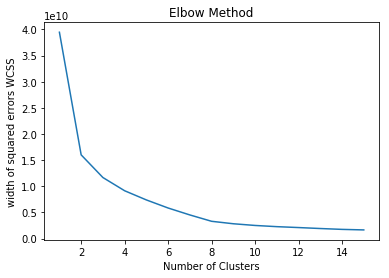

In [22]:
plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('width of squared errors WCSS')
plt.show()


In [23]:
#df_test=df.iloc[:,4:7]
df.fillna(0,inplace=True)
a=KMeans(n_clusters=2)
a.fit(df_test)
a.labels_


array([0, 0, 0, ..., 0, 0, 1])

In [24]:
df_test['clusters']=a.labels_

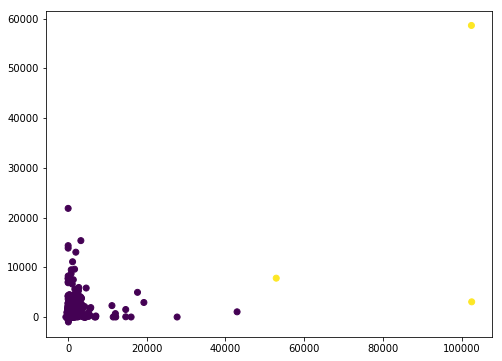

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df_test['OTP_SalesPerWk'], df_test['OtherGM_SalesPerWk'], c=a.labels_.astype(float))

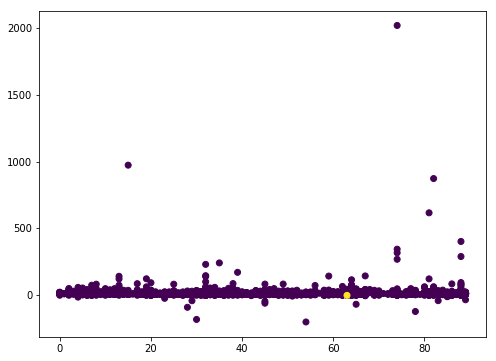

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df_test['names'], df_test['GP_percent'], c=a.labels_.astype(float))

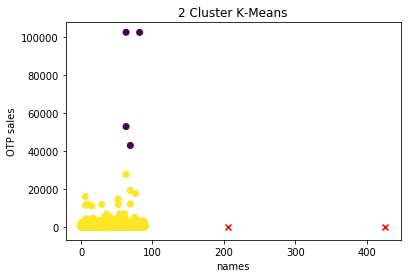

In [122]:
Y = df_test[['OTP_SalesPerWk']]

X = df_test[['names']]
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(Y)
#pca_d = pca.transform(Y)

#pca_c = pca.transform(X)
import pylab as pl
pl.figure('2 Cluster K-Means')

pl.scatter(X.values[:,0],Y.values[:,0], c=a.labels_)

pl.xlabel('names')

pl.ylabel('OTP sales')

pl.title('2 Cluster K-Means')
centers = np.array(a.cluster_centers_)
pl.scatter(centers[:,0], centers[:,1], marker="x", color='r')
pl.show()

In [123]:
df_test

,ChainID,Deliveries,Cartons_perWeek,Cartons_PPC,OTP_SalesPerWk,OtherGM_SalesPerWk,GP_percent,Fess_PerWk,names,SellplntNames,clusters
0,1089.0,5.0,181.00,2.20,1561.75,4058.05,10.24,16.75,18,0,1
1,1740.0,5.0,205.00,1.68,2067.13,4376.20,12.58,14.33,18,0,1
2,1143.0,8.0,131.00,2.50,1887.25,3744.63,9.10,16.75,18,0,1
3,342.0,4.0,269.00,0.58,3404.30,3742.82,8.59,16.75,23,0,1
4,808.0,8.0,132.00,0.10,1569.57,3972.30,13.03,6.56,56,0,1
5,1143.0,9.0,201.00,-0.01,2612.42,5271.79,8.92,16.75,18,0,1
6,808.0,8.0,168.00,0.13,1556.32,3575.92,12.76,6.56,56,0,1
7,1089.0,8.0,173.00,2.12,1807.61,2661.18,6.50,16.75,18,0,1
8,808.0,8.0,115.00,0.14,1236.11,3231.93,14.16,6.56,56,0,1
9,808.0,8.0,112.00,0.14,940.39,2727.35,16.16,4.92,56,0,1


In [115]:
Y.values[:,0]

array([1.561750e+03, 2.067130e+03, 1.887250e+03, ..., 4.166000e+01,
       1.145209e+04, 5.289760e+04])

In [63]:
#os.makedirs('Customer_Ratio')
writer = pd.ExcelWriter('KMeans/grpBy_Clusters_allFields_2clusters.xlsx')
df_test1= df_test.applymap(lambda x: round(x,2) if isinstance (x,(int,float)) else x)
df_test1.to_excel(writer,'Sheet1')
writer.save()